In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load Datasets (True.csv and Fake.csv)
fake_df = pd.read_csv('Fake.csv', encoding='latin-1')
true_df = pd.read_csv('True.csv', encoding='latin-1')

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_df.shape

(21417, 4)

In [6]:
fake_df.shape

(23481, 4)

In [7]:
# add labels (1 = true, 0 = fake)
true_df["label"] = 1
fake_df["label"] = 0

In [8]:
# merge datasets
df = pd.concat([true_df, fake_df], axis=0)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
df.shape

(44898, 5)

In [11]:
df.sample(4)

,title,text,subject,date,label
6238,"Russia's Lavrov, Tillerson to meet at U.N. Gen...",MOSCOW (Reuters) - Russian Foreign Minister Se...,worldnews,"September 12, 2017",1
23947,Trump closes in on Clinton's projected elector...,NEW YORK (Reuters) - Republican Donald Trump a...,politicsNews,"September 10, 2016",1
18239,MINNESOTA: MOB OF SOMALIS RAGE Through Upscale...,"Of course, you won t see this story on ABC, NB...",politics,"Jul 6, 2016",0
4664,White House agrees to detail ethics waivers,WASHINGTON (Reuters) - The White House will co...,politicsNews,"May 27, 2017",1


Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [13]:
df.head()

,title,text,subject,date,label
0,Trumpâs Administration Was Just Caught Up I...,While it can be said that no one is immune fro...,News,"April 5, 2017",0
1,MAXINE WATERS: âThese people trying to âdi...,MAXINE GOT A MAKEOVER and is hopping mad about...,left-news,"Jul 22, 2017",0
2,Factbox: Trump to meet with U.S. House Speaker...,(Reuters) - Donald Trump was scheduled to hold...,politicsNews,"December 9, 2016",1
3,Clinton details plans to boost small businesses,LOS ANGELES (Reuters) - Democrat Hillary Clint...,politicsNews,"August 23, 2016",1
4,âIs Donald Trump Really the Answer?â,21st Century Wire says Is Donald Trump the ans...,US_News,"September 13, 2016",0


In [14]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [15]:
# combine title and text
df["content"] = df["title"] + " " + df["text"]

In [16]:
columns_to_drop = ["title", "text", "subject", "date"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [17]:
df.head()

,label,content
0,0,Trumpâs Administration Was Just Caught Up I...
1,0,MAXINE WATERS: âThese people trying to âdi...
2,1,Factbox: Trump to meet with U.S. House Speaker...
3,1,Clinton details plans to boost small businesse...
4,0,âIs Donald Trump Really the Answer?â 21st ...


Exploratory Data Analysis (EDA)

In [18]:
df.head()

,label,content
0,0,Trumpâs Administration Was Just Caught Up I...
1,0,MAXINE WATERS: âThese people trying to âdi...
2,1,Factbox: Trump to meet with U.S. House Speaker...
3,1,Clinton details plans to boost small businesse...
4,0,âIs Donald Trump Really the Answer?â 21st ...


In [19]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [20]:
# Number of words
df['num_words'] = df['content'].apply(lambda x: len(str(x).split()))

# Number of sentences
df['num_sentences'] = df['content'].apply(lambda x: len(str(x).split('.')))

# Number of characters
df['num_characters'] = df['content'].apply(lambda x: len(str(x)))


In [21]:
df.head()

,label,content,num_words,num_sentences,num_characters
0,0,Trumpâs Administration Was Just Caught Up I...,354,17,2167
1,0,MAXINE WATERS: âThese people trying to âdi...,198,13,1085
2,1,Factbox: Trump to meet with U.S. House Speaker...,115,14,732
3,1,Clinton details plans to boost small businesse...,395,25,2566
4,0,âIs Donald Trump Really the Answer?â 21st ...,61,2,401


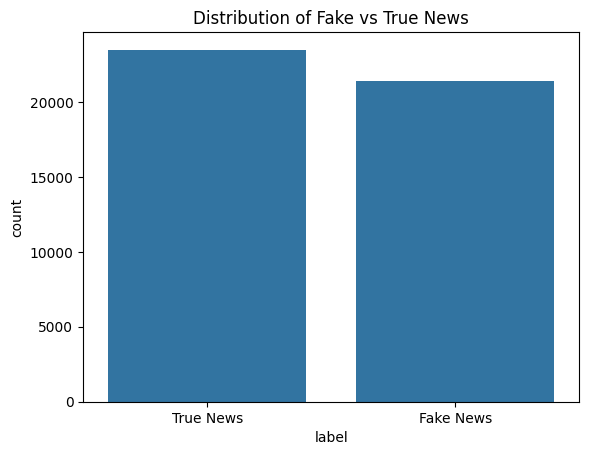

label
0    52.298543
1    47.701457
Name: proportion, dtype: float64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.xticks([0,1], ['True News', 'Fake News'])
plt.title("Distribution of Fake vs True News")
plt.show()

# Print percentages
print(df['label'].value_counts(normalize=True) * 100)


In [23]:
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,21417.000000,21417.000000,21417.000000
mean,2466.132045,395.742354,22.448242
std,1699.594063,274.180717,16.095428
min,32.000000,4.000000,1.000000
25%,985.000000,159.000000,10.000000
50%,2300.000000,369.000000,19.000000
75%,3325.000000,534.000000,30.000000
max,30218.000000,5182.000000,283.000000


In [24]:
df.corr(numeric_only=True)

,label,num_words,num_sentences,num_characters
label,1.000000,-0.059939,0.012148,-0.041118
num_words,-0.059939,1.000000,0.905101,0.995798
num_sentences,0.012148,0.905101,1.000000,0.911678
num_characters,-0.041118,0.995798,0.911678,1.000000


<Axes: >

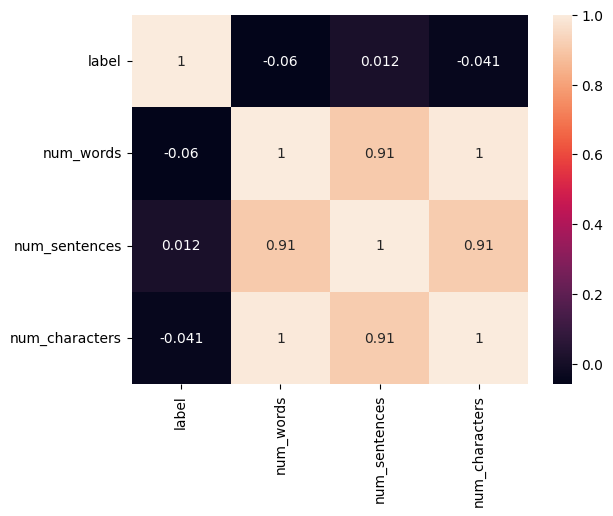

In [25]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

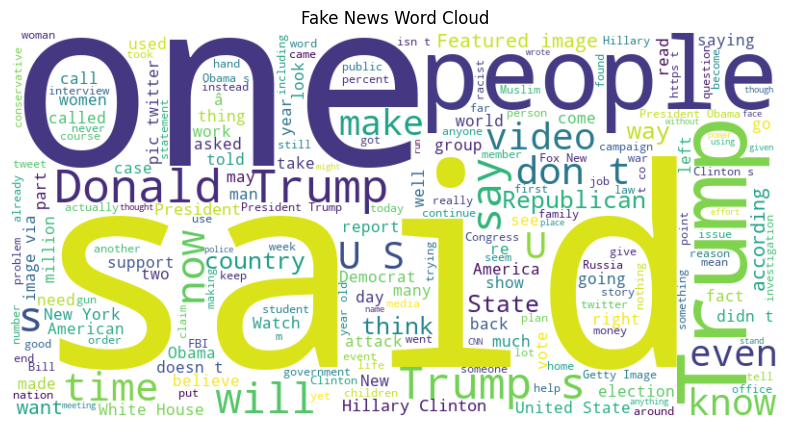

In [26]:
# Word clouds
from wordcloud import WordCloud

# Fake news
fake_text = ' '.join(df[df['label']==0]['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")
plt.show()

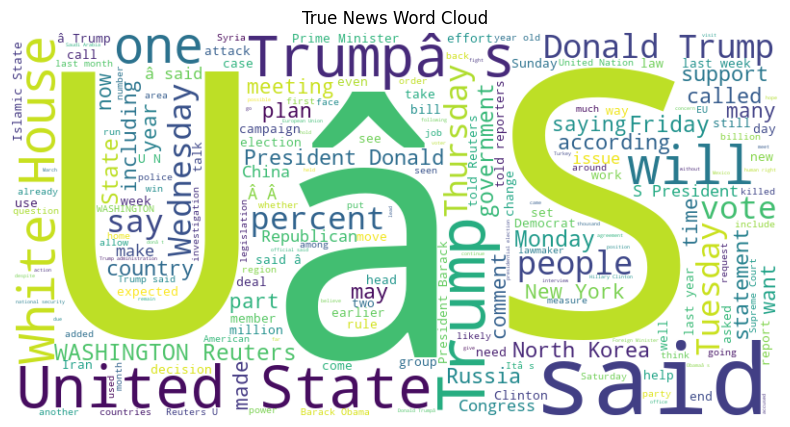

In [27]:
# True news
true_text = ' '.join(df[df['label']==1]['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("True News Word Cloud")
plt.show()

In [28]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Unzipping
[nltk_d

True

Data Preprocessing


In [41]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
df['content'] = df['content'].apply(lambda x: str(x).lower())


In [30]:
import string
df['content'] = df['content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [31]:
df['content'] = df['content'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()  # lowercase
    text = nltk.word_tokenize(text)  # same as training
    
    y = []
    for i in text:
        if i.isalnum():  # keep only alphanumeric
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words and i not in string.punctuation and not i.isdigit():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  # apply stemming
    
    return " ".join(y)


In [33]:
df[['content','processed_content','label']].head()

,content,processed_content,label
0,trumpâs administration was just caught up i...,administr caught prostitut scandal went detail...,0
1,maxine waters âthese people trying to âdis...,maxin water peopl tri video maxin got makeov h...,0
2,factbox trump to meet with us house speaker ry...,factbox trump meet us hous speaker ryan us sen...,1
3,clinton details plans to boost small businesse...,clinton detail plan boost small busi lo angel ...,1
4,âis donald trump really the answerâ st cen...,donald trump realli st centuri wire say donald...,0


Model Building

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['processed_content'])
y = df['label']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

clfs = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Multinomial NB': MultinomialNB(),
    'Bernoulli NB': BernoulliNB(),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
}



In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def train_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


In [38]:
results = []

for name, clf in clfs.items():
    metrics = train_evaluate(clf, X_train, y_train, X_test, y_test)
    metrics['Algorithm'] = name
    results.append(metrics)

performance_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False).reset_index(drop=True)
performance_df

c:\Users\somja\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:04:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,Precision,Recall,F1-Score,Confusion Matrix,Algorithm
0,0.997661,0.997665,0.997432,0.997549,"[[4686, 10], [11, 4273]]",XGBoost
1,0.997439,0.997664,0.996965,0.997315,"[[4686, 10], [13, 4271]]",Random Forest
2,0.996993,0.997662,0.996032,0.996846,"[[4686, 10], [17, 4267]]",Bagging
3,0.994766,0.993248,0.995798,0.994522,"[[4667, 29], [18, 4266]]",Decision Tree
4,0.994655,0.992100,0.996732,0.994411,"[[4662, 34], [14, 4270]]",Gradient Boosting
5,0.993987,0.990947,0.996499,0.993715,"[[4657, 39], [15, 4269]]",AdaBoost
6,0.993318,0.990478,0.995565,0.993015,"[[4655, 41], [19, 4265]]",Logistic Regression
7,0.993318,0.991163,0.994865,0.993010,"[[4658, 38], [22, 4262]]",Extra Trees
8,0.987305,0.986014,0.987395,0.986704,"[[4636, 60], [54, 4230]]",SVC
9,0.967706,0.962055,0.970588,0.966303,"[[4532, 164], [126, 4158]]",Bernoulli NB


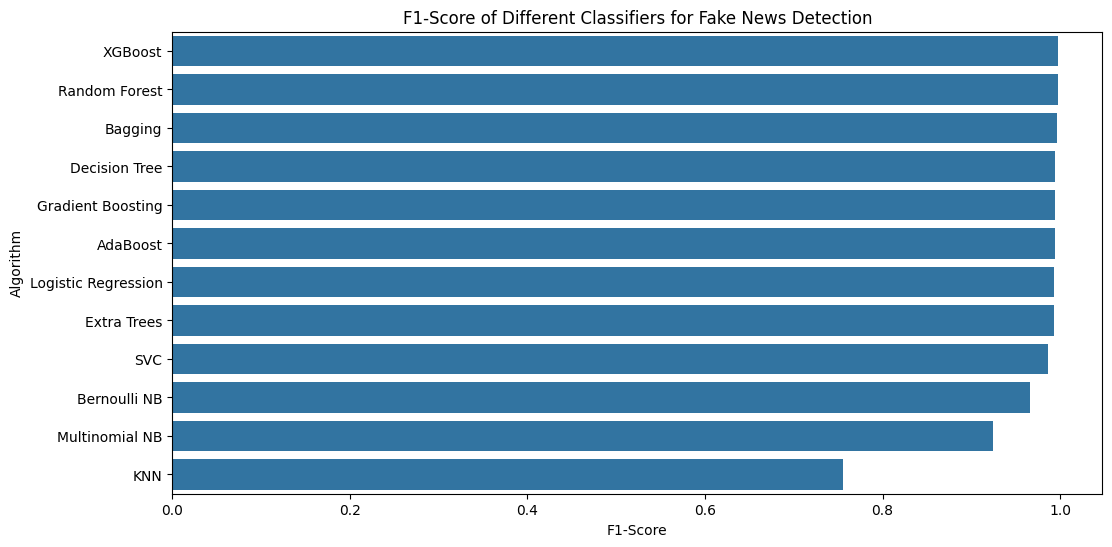

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='F1-Score', y='Algorithm', data=performance_df)
plt.title("F1-Score of Different Classifiers for Fake News Detection")
plt.show()

In [40]:
# Pick the best model (highest F1-Score)
import pickle
import warnings
warnings.filterwarnings("ignore")


best_model_name = performance_df.iloc[0]['Algorithm']
best_model = clfs[best_model_name]

best_model.fit(X, y)  # Train on full dataset

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('best_fake_news_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)



print(f"Best model ({best_model_name}) saved successfully!")


Best model (XGBoost) saved successfully!
